# Στοχαστικές Διεργασίες και Βελτιστοποίηση στη Μηχανική Μάθηση

## 9ο Εργαστήριο - *Support Vector Machines*

- Ονομ/νυμο: Χρήστος Νίκου
- AM: 03400146
- Ιδιότητα: Μεταπτυχιακός φοιτητής Επιστήμης Δεδομένων και Μηχανικής Μάθησης (ΕΔΕΜΜ)
- Ηλεκτρονική Διεύθυνση: christosnikou@mail.ntua.gr / chrisnick92@gmail.com

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<br>
<strong>Για το εργαστήριο του μαθήματος "<i>Στοχαστικές Διεργασίες & Βελτιστοποίηση στη Μηχανική Μάθηση</i>" έχουμε προσαρμόσει το κείμενο και τον κώδικα από το παραπάνω βιβλίο στις ανάγκες μας.</strong>

<b>Τρέξτε το Notebook και απαντήστε, <u>συνοπτικά</u>, στις ερωτήσεις.</b>

<h2><b><i>Support Vector Machines</i></b></h2>

Αρχικά, θα φορτώσουμε τις βιβλιοθήκες που είναι απαραίτητες για την άσκηση. Όλες οι βιβλιοθήκες είναι εγκατεστημένες στο Colab.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.datasets import make_circles
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()

Το παρακάτω τμήμα κώδικα δημιουργεί και εμφανίζει δείγματα από 2 clusters με μία δεδομένη τυπική απόκλιση.

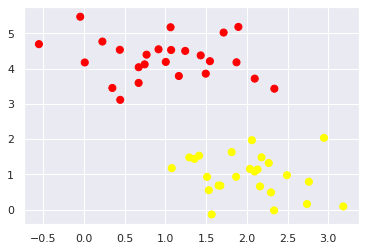

In [ ]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Γίνεται εύκολα αντιληπτό ότι οι δύο κατηγορίες μπορούν να διαχωριστούν με ευθείες γραμμές. Στο παρακάτω σχήμα φαίνονται 3 τέτοιες ενδεικτικές γραμμές. 
<ul>
<li><b>Ερώτηση 1:</b> Σε ποια κατηγορία θα ανήκει το test example που φαίνεται στην παρακάτω με εικόνα με το σύμβολο 'Χ' ανάλογα με την ευθεία γραμμή που θα επιλεχθεί; </li>
<li><b>Ερώτηση 2:</b> Γιατί αυτή η μέθοδος διαχωρισμού των κλάσεων ενός ταξινομητή μπορεί να οδηγήσει σε μη επιθυμητά αποτελέσματα;</li>
</ul>

#### Απάντηση - Ερώτηση 1

Το test example που φαίνεται στην παρακάτω εικόνα θα «μαρκαριστεί» με κίτρινο χρώμα για την ευθεία που έχει αρνητική κλίση καθώς βρίσκεται «κάτω» απ'αυτήν ενώ για τις άλλες δύο ευθείες (με θετική κλίση) θα «μαρκαριστεί» με κόκκινο χρώμα.
<br><br>

#### Απάντηση - Ερώτηση 2

Παρόλο που και οι τρεις ευθείες διαχωρίζουν τα δεδομένα, το πρόβλημα με τις συγκεκριμένες ευθείες μπορεί να προκύψει κατά τη διαδικασία πρόβλεψης νέων δεδομένων. Δηλαδή, οι τρεις αυτές ευθείες δεν θα έχουν τη βέλτιστη δυνατή γενίκευση. Ο λόγος για τον οποίο συμβαίνει αυτό οφείλεται στο ότι κάθε μια απ' τις τρεις ευθείες δεν «ισαπέχει» από τις δύο κατηγορίες με αποτέλεσμα να υπάρχει κάποια μεροληψία αυτών των ταξινομητών ως κάποια απ' τις δύο κατηγορίες.


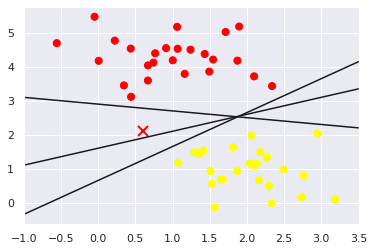

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Στην περίπτωση του ταξινομητή SVM το πρόβλημα αυτό επιλύεται με τον παρακάτω τρόπο: Αντί να τραβήξουμε μία γραμμή μηδενικού πλάτους ανάμεσα στις δύο κλάσεις, τραβάμε μία γραμμή με περιθώρια (margins) στις δύο πλευρές της. Η μέθοδος αυτή για τις γραμμές του προηγούμενου προβλήματος φαίνεται στην παρακάτω εικόνα. 
<ul>
<li><b>Ερώτηση 3:</b> Ποιος περιορισμός ισχύει για τα περιθώρια της εκάστοτε γραμμής;</li>
<li><b>Ερώτηση 4:</b> Με ποιο κριτήριο επιλέγεται η καλύτερη γραμμή;</li>
</ul>

#### Ερώτηση 3

Ο περιορισμός που ισχύει για τα περιθώρια της εκάστοτε γραμμής είναι ότι οι ευθείες που απαρτίζουν τα περιθώρια θα πρέπει να είναι παράλληλες προς την εκάστοτε ευθεία και ανάμεσά τους να μην περιέχεται κανένα σημείο του συνόλου δειγμάτων.<br>

#### Ερώτηση 4

Το κριτήριο με το οποίο επιλέγεται η καλύτερη γραμμή είναι η απόσταση των δύο παράλληλων ευθείων που απαρτίζουν τα περιθώρια της κάθε γραμμής να είναι η μέγιστη δυνατή.

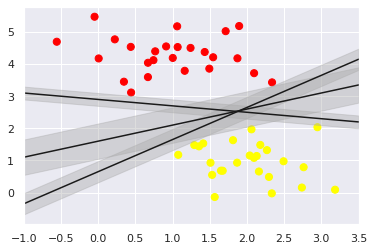

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Εκπαίδευση του Μοντέλου

Χρησιμοποιώντας το πακέτο Scikit-Learn θα εκπαιδεύσουμε τον αλγόριθμο SVM πάνω στα δεδομένα του προηγούμενου προβλήματος, χρησιμοποιώντας γραμμικό πυρήνα.

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Με την παρακάτω μέθοδο θα εμφανιστεί στο σχήμα που ακολουθεί η βέλτιστη γραμμή διαχωρισμού των δύο κατηγοριών, καθώς και τα περιθώριά της. Τα training examples που ακουμπούν πάνω στα όρια ονομάζονται Support Vectors.

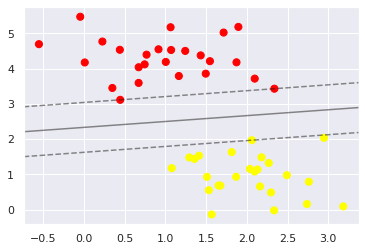

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Στο ακόλουθο σχήμα, η διαδικασία επαναλαμβάνεται για δύο datasets που περιλαμβάνουν 60 και 120 training examples αντίστοιχα. 
<ul>
<li><b>Ερώτηση 5:</b> Τι παρατηρείτε σχετικά με τη βέλτιστη γραμμή που διαχωρίζει τις δύο κατηγορίες και τα περιθώριά της;</li>
<li><b>Ερώτηση 6:</b>Τι αρκεί να κάνει ο αλγόριθμος για να ταξινομήσει νέα δεδομένα που θα λάβει στην είσοδό του;</li>
</ul>

#### Ερώτηση 5<br>

Αυτό που παρατηρούμε σχετικά με τη βέλτιση γραμμή που διαχωρίζει τις δύο κατηγορίες είναι ότι ικανοποιεί όλες τις συνθήκες που αναφέρθηκαν στην Ερώτηση 3. Δηλαδή, οι περιθώριες γραμμές είναι παράλληλες προς την ευθεία διαχωρισμού και ανάμεσά τους δεν περιέχεται κανένα σημείο του συνόλου εκπαίδευσης. Επίσης, στις δύο περιθώριες ευθείες βρίσκονται κάποια σημεία απ' τις δύο κατηγορίες τα οποία αποτελούν τα διανύσματα στήριξης της ευθείας (support vectors).
<br>

#### Ερώτηση 6<br>

Η ταξινόμηση των νέων δεδομένων γίνεται ως εξής: Εάν η συνάρτηση της ευθείας διαχωρισμού περιγράφεται απ' την εξίσωση $g(x)=0$, τότε ένα νέο σημείο $x'$ ταξινομείται στην κατηγορία με τα κόκκινα σημεία αν και μόνο $g(x')>0$ και στα κίτρινα αν και μόνο αν $g(x')<0$. Στη περίπτωση που $g(x')=0$ τότε η ταξινόμηση γίνεται κατά τυχαίο τρόπο.

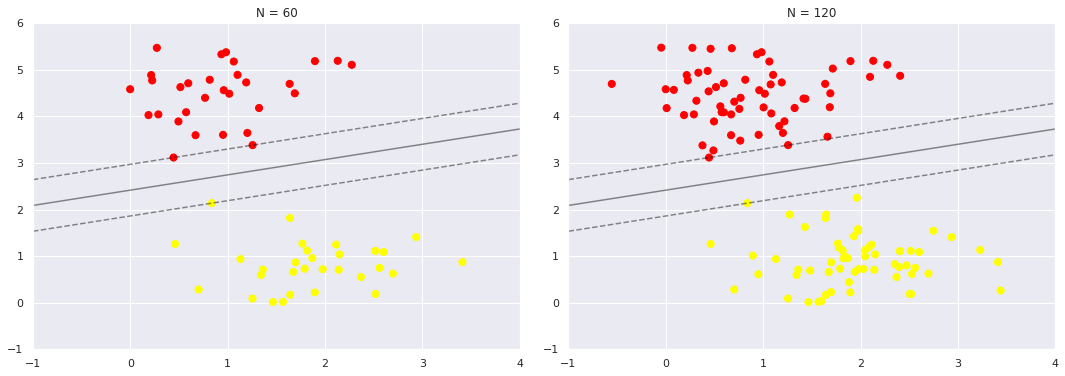

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### Μη Γραμμικά Διαχωρίσιμες Κατηγορίες: Kernel SVM

Στην περίπτωση που οι κατηγορίες του προβλήματος δεν είναι γραμμικά διαχωρίσιμες, ο αλγόριθμος SVM χρησιμοποιεί μη γραμμικούς πυρήνες (kernels) για να προβάλει τα δεδομένα εκπαίδευσης σε μεγαλύτερη διάσταση όπου μπορεί να τα καταστήσει γραμμικά διαχωρίσιμα. Μία τέτοια περίπτωση δεδομένων εκπαίδευσης παρουσιάζεται στο επόμενο σχήμα.

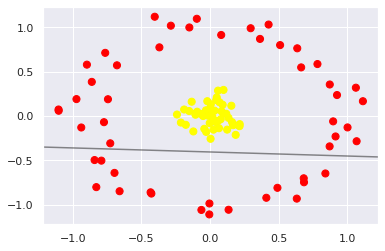

In [ ]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Είναι φανερό ότι τα δεδομένα εκπαίδευσης δεν μπορούν να διαχωριστούν γραμμικά. Στο επόμενο σχήμα φαίνεται η προβολή τους στις τρεις διαστάσεις με τη χρήση ενός μη γραμμικού πυρήνα. 
<ul>
<li><b>Ερώτηση 7:</b> Τι είδους πυρήνας χρησιμοποιήθηκε;</li>
<li><b>Ερώτηση 8:</b> Δώστε ένα παράδειγμα γραμμικού ορίου που θα μπορούσε να διαχωρίσει τις δύο κατηγορίες.</li>
</ul>

#### Ερώτηση 7<br>

Ο πυρήνας που χρησιμοποιήθηκε είναι ο Γκαουσιανός πυρήνας ο οποίος δίνεται μέσω της σχέσης<br>

$$K(x,x')=\exp\biggl(-\frac{||x-x'||^2}{2σ^2}\biggr),$$<br>

όπου $||x-x'||$ είναι η Ευκλείδεια απόσταση μεταξύ του $x,x'$.
<br>

#### Ερώτηση 8<br>

Kοιτάζοντας το τρισδιάστατο σχήμα που βλέπουμε παρακάτω παρατηρούμε ότι ένα γραμμικό όριο που μπορεί να διαχωρίσει τις δύο κλάσεις είναι το επίπεδο<br>

$$\Pi =\biggl\{(x,y,z):\, z= 0.6\biggr\}.$$<br>

Δηλαδή, το επίπεδο $\Pi$ το οποίο είναι παράλληλο στο επίπεδο $xy$ και βρίσκεται σε ύψος $0.6$

In [ ]:
r = np.exp(-(X ** 2).sum(1))

In [ ]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

Η εύρεση του πυρήνα που μπορεί να διαχωρίσει με τον καλύτερο τρόπο τα δεδομένα απαιτεί, συνήθως, πολλούς υπολογισμούς. 
<ul>
<li><b>Ερώτηση 9:</b> Ποια μέθοδος μπορεί να βοηθήσει σε αυτό και πώς; (hint: <a href="https://en.wikipedia.org/wiki/Kernel_trick">Kernel Trick</a>)</li>
</ul>

Παρακάτω γίνεται η εκπαίδευση του αλγορίθμου SVM με μη γραμμικό πυρήνα.

#### Ερώτηση 9

Η μέθοδος που μπορεί να βοηθήσει σε αυτή την περίπτωση είναι η μέθοδος του *πυρήνα*. Η μέθοδος αυτή χρησιμοποιείται κυρίως όταν το πρόβλημα ταξινόμησης είναι μη γραμμικά διαχωρίσιμο. Σε αυτή την περίπτωση, εάν το πρόβλημα είναι μη γραμμικά διαχωρίσιμο στον $\mathbb{R}^n$ τότε μέσω μιας κατάλληλης απεικόνισης $\phi:\mathbb{R}^n\to \mathbb{R}^m$ απεικονίζουμε τα δεδομένα σε έναν Ευκλείδειο χώρο (συνήθως) μεγαλύτερης διάστασης ώστε εκεί τα δεδομένα να διαχωρίζονται από κάποιο υπερεπίπεδο. Τότε, εάν συμβολίζουμε με $\{(x_i,y_i)\}_{i=1}^{n}$ το σύνολο εκπαίδευσης των δύο κατηγοριών (π.χ Α,Β) με<br>

$$y_i =\begin{cases}1,\, x_i\in A\\ -1,\, x_i\in B\end{cases},$$<br>

ο προσδιορισμός των βαρών $\omega\in \mathbb{R}^m,\, \omega_0\in \mathbb{R}$ του υπερεπιπέδου $g(x)=\omega^T\cdot x + \omega_0$ ανάγεται στην επίλυση του προβλήματος μεγιστοποίησης<br>

$$\tag{1}\max f(c_1,\dots,c_n) = \sum_{i=1}^{n}c_i-\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^n y_ic_i\phi(x_i)^T\cdot\phi(x_j)y_jc_j,$$<br>

υπό τους περιορισμούς $\sum_{i=1}^nc_iy_i=0$ και $0\leq c_i\leq \frac{1}{2n\lambda}$ για κάθε $i$. Τότε, τα βάρη $\omega$ προσδιορίζονται μέσω της <br>

$$\tag{2}\omega = \sum_{i=1}^{n}c_iy_i\phi(x_i),$$<br>

και ο σταθερός όρος $\omega_0$ μέσω της $\omega_0 = \omega^T\cdot \phi(x_i)y_i$, όπου $x_i$ είναι ένα οποιοδήποτε διάνυσμα στήριξης. Το πρόβλημα με τη συνάρτηση που εμφανίζεται στο δεξί μέλος της $(1)$ είναι ότι ο υπολογισμός της συνάρτησης $\phi(x)$ είναι αρκετά χρονοβόρος, ειδικά για μεγάλες τιμές της διάστασης $m$. Παρ'όλα αυτά, παρατηρώντας ότι αυτό που μας ενδιαφέρει για τη μεγιστοποίηση της $(1)$ είναι μόνο το εσωτερικό γινόμενο $\phi(x_i)^T\cdot \phi(x_j)$ εάν καταφέρουμε να γράψουμε αυτόν τον υπολογισμό σε έναν κλειστό τύπο, τότε το υπολογιστικός κόστος θα μειωθεί σημαντικά. Αυτόν τον ρόλο παίζουν οι συναρτήσεις πυρήνα. Δηλαδή, οι συναρτήσεις πυρήνα είναι συναρτήσεις $K:\mathbb{R}^n\times \mathbb{R}^n\to \mathbb{R}$ για τις οποίες ισχύει ότι<br>

$$\tag{3}K(x_i,x_j) = \phi(x_i)^T\cdot \phi(x_j),$$<br>

για κάθε ζευγάρι $x_i,x_j\in \mathbb{R}^n$. Η επίλυση του προβλήματος $(1)$ είναι η μέθοδος του πυρήνα και η αναπαράσταση του εσωτερικού γινομένου μέσω της $K$ αναφέρεται στη βιβλιογραφία εώς το «κόλπο του πυρήνα» (kernel trick). Αυτή η παρατήρηση μειώνει σημαντικά το υπολογιστικό κόστος του προσδιορισμού των βαρών $\omega,\omega_0$ μέσω της επίλυσης του $(1)$.

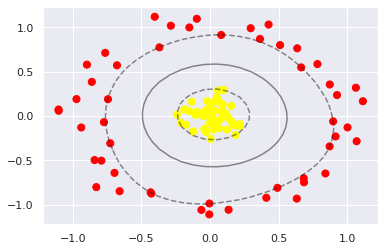

In [ ]:
$clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');